In [80]:
import pandas as pd
import numpy as np
import re
import sklearn
import tensorflow
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
from langdetect import detect
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import accuracy_score

## Data Processing
**Importing Datasets**

In [9]:
#importing the datasets
data1_fake = pd.read_csv('./Data_RealFake/Dataset1/Fake1.csv')
data1_true = pd.read_csv('./Data_RealFake/Dataset1/True1.csv')

dtset1_fake = pd.DataFrame(data1_fake)
dtset1_true = pd.DataFrame(data1_true)

Changing the labels: fake = 0 and real = 1

In [10]:
dtset1_fake['label']=0
dtset1_true['label']=1

pd.DataFrame.head(dtset1_fake)
pd.DataFrame.head(dtset1_true)

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [11]:
print(dtset1_fake.shape)
print(dtset1_true.shape)

(23481, 5)
(21417, 5)


Concatinating Datasets

In [12]:
dataset1 = pd.concat([dtset1_fake, dtset1_true])
pd.DataFrame.head(dataset1)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [13]:
dataset1.label.value_counts()

0    23481
1    21417
Name: label, dtype: int64

Combining Title and Text

In [14]:
dataset1['content'] = dataset1['title']+" "+dataset1['text']

In [15]:
pd.DataFrame.head(dataset1)

,title,text,subject,date,label,content
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,Donald Trump Sends Out Embarrassing New Year’...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,Drunk Bragging Trump Staffer Started Russian ...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,Sheriff David Clarke Becomes An Internet Joke...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,Trump Is So Obsessed He Even Has Obama’s Name...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,Pope Francis Just Called Out Donald Trump Dur...


Dataset shuffle

In [16]:
#dataset1 = shuffle(dataset1)
#dataset1[:10]

Text Cleaning

In [17]:
content = dataset1.content
print(content)

0         Donald Trump Sends Out Embarrassing New Year’...
1         Drunk Bragging Trump Staffer Started Russian ...
2         Sheriff David Clarke Becomes An Internet Joke...
3         Trump Is So Obsessed He Even Has Obama’s Name...
4         Pope Francis Just Called Out Donald Trump Dur...
                               ...                        
21412    'Fully committed' NATO backs new U.S. approach...
21413    LexisNexis withdrew two products from Chinese ...
21414    Minsk cultural hub becomes haven from authorit...
21415    Vatican upbeat on possibility of Pope Francis ...
21416    Indonesia to buy $1.14 billion worth of Russia...
Name: content, Length: 44898, dtype: object


In [18]:
port_stem = PorterStemmer()

def stemming(content):
    stemmed = re.sub('[^a-zA-Z]',' ', content)
    stemmed = stemmed.lower()
    stemmed = stemmed.split()
    stemmed = [port_stem.stem(word) for word in stemmed if not word in stopwords.words('english')]
    stemmed = ' '.join(stemmed)
    return stemmed

In [ ]:
dataset1['content'] = dataset1['content'].apply(stemming)
pd.DataFrame.head(dataset1)

In [20]:
X = dataset1['content'].values

In [21]:
#TfIdf Vectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

print(X)

  (0, 121245)	0.03493138105375333
  (0, 121196)	0.0925351818248464
  (0, 120806)	0.04705882505914014
  (0, 120794)	0.22397695617886632
  (0, 120735)	0.0690169893140659
  (0, 119813)	0.02553530393651721
  (0, 119630)	0.02175717888185537
  (0, 119510)	0.018464753242459764
  (0, 119490)	0.028112715715497144
  (0, 119395)	0.0317136712548268
  (0, 119394)	0.02050601156045364
  (0, 119067)	0.16374976719209164
  (0, 118719)	0.02225305337687285
  (0, 118542)	0.01892551586770723
  (0, 118487)	0.0290687943620557
  (0, 118294)	0.012099355686385777
  (0, 118245)	0.02475999299710875
  (0, 118026)	0.012020042873253367
  (0, 118012)	0.02126194805475316
  (0, 118001)	0.0716536150036487
  (0, 117994)	0.049429098531608144
  (0, 117955)	0.0716536150036487
  (0, 117154)	0.03572879442009054
  (0, 116518)	0.026315763296670753
  (0, 115624)	0.05029958970114686
  :	:
  (44897, 21939)	0.1057515015694217
  (44897, 18233)	0.08615292828675535
  (44897, 18169)	0.06374407852186688
  (44897, 17874)	0.030497551736619

**Train Test Split**

In [22]:
y = dataset1['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=80)

print(X_train.shape)
print(X_test.shape)


(35918, 122513)
(8980, 122513)


In [23]:
X_train.shape

(35918, 122513)

In [24]:
X_test[:20]

X_test.shape

(8980, 122513)

In [25]:
y_train[:20]
y_train.shape

(35918,)

In [26]:
y_test.shape

(8980,)

In [28]:
X_train.shape[0]

35918

In [30]:
X_test.shape[0]

8980

**CountVectorizer**

In [31]:
#covector = CountVectorizer()
#X_traincovector = covector.transform(X_train)
#X_testcovector = covector.transform(X_test)

In [32]:
#print(X_traincovector)

In [33]:
#print(X_testcovector)

**Linear Regression**

In [34]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_test, y_test)
clf.predict(X_test)

array([-4.46363972e-06,  1.00000199e+00,  9.99994152e-01, ...,
        9.99983872e-01,  1.87182048e-06, -2.26479281e-06])

In [35]:
clf.score(X_test, y_test)

0.9999999979154318

**Logistic Regression**

In [81]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
LRpred = LR.predict(X_test)

In [82]:
print(LRpred)
print(y_test)

[0 1 1 ... 1 0 0]
[0 1 1 ... 1 0 0]


In [83]:
LRscore = LR.score(X_test, y_test)
print(LRscore)

0.9878619153674832


[[4648   55]
 [  54 4223]]


c:\Users\jimue\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


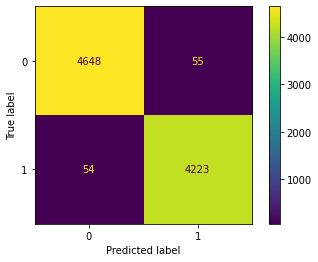

In [84]:
from sklearn import metrics
LR_r_score = metrics.confusion_matrix(y_test, LRpred)
print(LR_r_score)
plot_confusion_matrix(LR, X_test, y_test)

In [85]:
LR_r_score = np.flip(LR_r_score)

#accuracy
LR_acc = (LR_r_score[0][0] + LR_r_score[-1][-1]) / np.sum(LR_r_score)
print('accuracy: '+ str(float(LR_acc)))

#precission
LR_precision = sklearn.metrics.precision_score(y_test, LRpred)
print('precision: '+ str(float(LR_precision)))

#recall
LR_recall = sklearn.metrics.recall_score(y_test, LRpred)
print('recall: '+ str(float(LR_recall)))

accuracy: 0.9878619153674832
precision: 0.9871435250116877
recall: 0.9873743277998597


*Adaboost Classifier*

In [99]:
Ada = AdaBoostClassifier()
Ada.fit(X_train, y_train)
Adapred = Ada.predict(X_test)

In [100]:
print(Adapred)
print(y_test)

[0 1 1 ... 1 0 0]
[0 1 1 ... 1 0 0]


In [101]:
Adascore = Ada.score(X_test, y_test)
print(Adascore)

0.9967706013363029


[[4689   14]
 [  15 4262]]


c:\Users\jimue\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


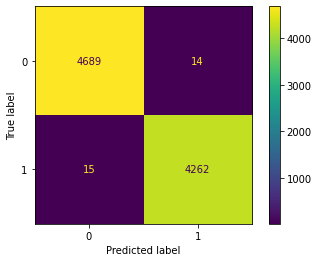

In [102]:
Ada_r_score = metrics.confusion_matrix(y_test, Adapred)
print(Ada_r_score)
plot_confusion_matrix(Ada, X_test, y_test)

In [103]:
Ada_r_score = np.flip(Ada_r_score)

#accuracy
Ada_acc = (Ada_r_score[0][0] + Ada_r_score[-1][-1]) / np.sum(Ada_r_score)
print('accuracy: '+ str(float(Ada_acc)))

#precission
Ada_precision = sklearn.metrics.precision_score(y_test, Adapred)
print('precision: '+ str(float(Ada_precision)))

#recall
Ada_recall = sklearn.metrics.recall_score(y_test, Adapred)
print('recall: '+ str(float(Ada_recall)))

accuracy: 0.9967706013363029
precision: 0.9967259120673526
recall: 0.9964928688332944


**Accuracy**

In [104]:
X_train_prediction = logreg.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
training_data_accuracy

0.9928726543794197

In [105]:
X_test_prediction = logreg.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, y_test)
testing_data_accuracy

0.9878619153674832

In [106]:
def wordopt(text):
    text = re.sub('[^a-zA-Z]',' ', text)
    text = text.lower()
    return text

def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(stemming) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorizer.transform(new_x_test)
    pred_LR = logreg.predict(new_xv_test)
    
    return print((output_lable(pred_LR[0])))


In [107]:
news = str(input())
manual_testing(news)

Fake News
